In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import neighbors
from math import sqrt

from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display
##Stored and run if necessary

In [ ]:
obesity = pd.read_csv('/content/Copy of Updated_Obesity_Dataset (1).csv')

obesity.head(10)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,29.0,Male,1.62,53.0,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,23.0,Female,1.50,55.0,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,22.0,Male,1.64,53.0,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,24.0,Male,1.78,64.0,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
9,22.0,Male,1.72,68.0,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [ ]:
obesity.shape

(2111, 17)

In [ ]:
obesity.isnull()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
obesity.isnull().sum()

,0
Age,0
Gender,11
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
obesity.drop(['CH2O'], axis=1, inplace=True)

In [ ]:
obesity.isnull().sum()

,0
Age,0
Gender,11
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
# Catagorical data repleace with mode
obesity['Gender'] = obesity['Gender'].fillna(obesity['Gender'].mode()[0])
obesity['family_history_with_overweight'] = obesity['family_history_with_overweight'].fillna(obesity['family_history_with_overweight'].mode()[0])

In [ ]:
obesity.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
obesity.dtypes

,0
Age,float64
Gender,object
Height,float64
Weight,float64
CALC,object
FAVC,object
FCVC,float64
NCP,float64
SCC,object
SMOKE,object


In [ ]:
print("Gender categorical features Value: ")
print(obesity['Gender'].unique())
print("----------------------------------------------------------------------------")
print()

print("CALC categorical features Value: ")
print(obesity['CALC'].unique())
print("----------------------------------------------------------------------------")
print()

print("FAVC categorical features Value: ")
print(obesity['FAVC'].unique())
print("----------------------------------------------------------------------------")
print()

print("SCC categorical features Value: ")
print(obesity['SCC'].unique())
print("----------------------------------------------------------------------------")
print()

print("SMOKE categorical features Value: ")
print(obesity['SMOKE'].unique())
print("----------------------------------------------------------------------------")
print()

print("family_history_with_overweight categorical features Value: ")
print(obesity['family_history_with_overweight'].unique())
print("----------------------------------------------------------------------------")
print()

print("CAEC categorical features Value: ")
print(obesity['CAEC'].unique())
print("----------------------------------------------------------------------------")
print()

print("MTRANS categorical features Value: ")
print(obesity['MTRANS'].unique())
print("----------------------------------------------------------------------------")
print()

print("NObeyesdad categorical features Value: ")
print(obesity['NObeyesdad'].unique())
print("----------------------------------------------------------------------------")
print()

Gender categorical features Value: 
['Female' 'Male']
----------------------------------------------------------------------------

CALC categorical features Value: 
['no' 'Sometimes' 'Frequently' 'Always']
----------------------------------------------------------------------------

FAVC categorical features Value: 
['no' 'yes']
----------------------------------------------------------------------------

SCC categorical features Value: 
['no' 'yes']
----------------------------------------------------------------------------

SMOKE categorical features Value: 
['no' 'yes']
----------------------------------------------------------------------------

family_history_with_overweight categorical features Value: 
['yes' 'no']
----------------------------------------------------------------------------

CAEC categorical features Value: 
['Sometimes' 'Frequently' 'Always' 'no']
----------------------------------------------------------------------------

MTRANS categorical features Value: 


In [ ]:
obesity['NObeyesdad'] = obesity['NObeyesdad'].map({'Normal_Weight':0, 'Overweight_Level_I':1, 'Overweight_Level_II':2,
                                                   'Obesity_Type_I':3, 'Obesity_Type_II':4, 'Obesity_Type_III': 5, 'Insufficient_Weight':6})

ONE-HOT ENCODING

In [ ]:
categorical_cols = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']

obesity_encoded = pd.get_dummies(obesity, columns=categorical_cols,dtype=int)
obesity_encoded.head()

In [ ]:
obesity_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2111 non-null   float64
 1   Height                              2111 non-null   float64
 2   Weight                              2111 non-null   float64
 3   FCVC                                2111 non-null   float64
 4   NCP                                 2111 non-null   float64
 5   FAF                                 2111 non-null   float64
 6   TUE                                 2111 non-null   float64
 7   NObeyesdad                          2111 non-null   int64  
 8   Gender_Female                       2111 non-null   int64  
 9   Gender_Male                         2111 non-null   int64  
 10  CALC_Always                         2111 non-null   int64  
 11  CALC_Frequently                     2111 no

STANDARDIZATION OF DATA

*SCALING*

In [ ]:
scaler = StandardScaler()

batch_size = 500

for i in range(0, len(obesity_encoded), batch_size):
    scaler.partial_fit(obesity_encoded[i:i+batch_size])

X_scaled = scaler.transform(obesity_encoded)

X_scaled

array([[-0.52212439, -0.87558934, -0.86255819, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.52212439, -1.94759928, -1.16807699, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.20688898,  1.05402854, -0.36609013, ..., -0.07237469,
         0.57972058, -0.16507758],
       ...,
       [-0.28190933,  0.54167211,  1.79886776, ..., -0.07237469,
         0.57972058, -0.16507758],
       [ 0.00777624,  0.40492652,  1.78577968, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.10211908,  0.39834438,  1.7905916 , ..., -0.07237469,
         0.57972058, -0.16507758]])

In [ ]:
scaler = StandardScaler()

batch_size = 500

for i in range(0, len(obesity_encoded), batch_size):
    scaler.partial_fit(obesity_encoded[i:i+batch_size])

X_scaled = scaler.transform(obesity_encoded)

X_scaled

array([[-0.52212439, -0.87558934, -0.86255819, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.52212439, -1.94759928, -1.16807699, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.20688898,  1.05402854, -0.36609013, ..., -0.07237469,
         0.57972058, -0.16507758],
       ...,
       [-0.28190933,  0.54167211,  1.79886776, ..., -0.07237469,
         0.57972058, -0.16507758],
       [ 0.00777624,  0.40492652,  1.78577968, ..., -0.07237469,
         0.57972058, -0.16507758],
       [-0.10211908,  0.39834438,  1.7905916 , ..., -0.07237469,
         0.57972058, -0.16507758]])

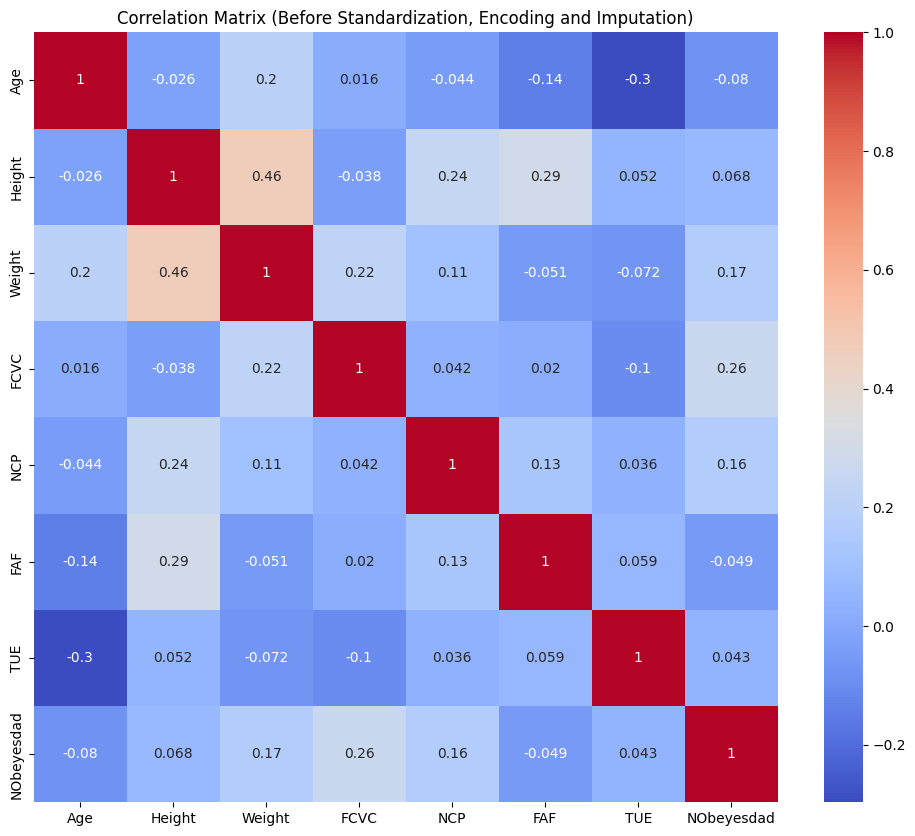

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=obesity_encoded.columns)
numeric_columns = obesity.select_dtypes(include=['int64', 'float64']).columns
housing_numeric = obesity[numeric_columns]

corr_before = housing_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_before, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Before Standardization, Encoding and Imputation)')
plt.show()

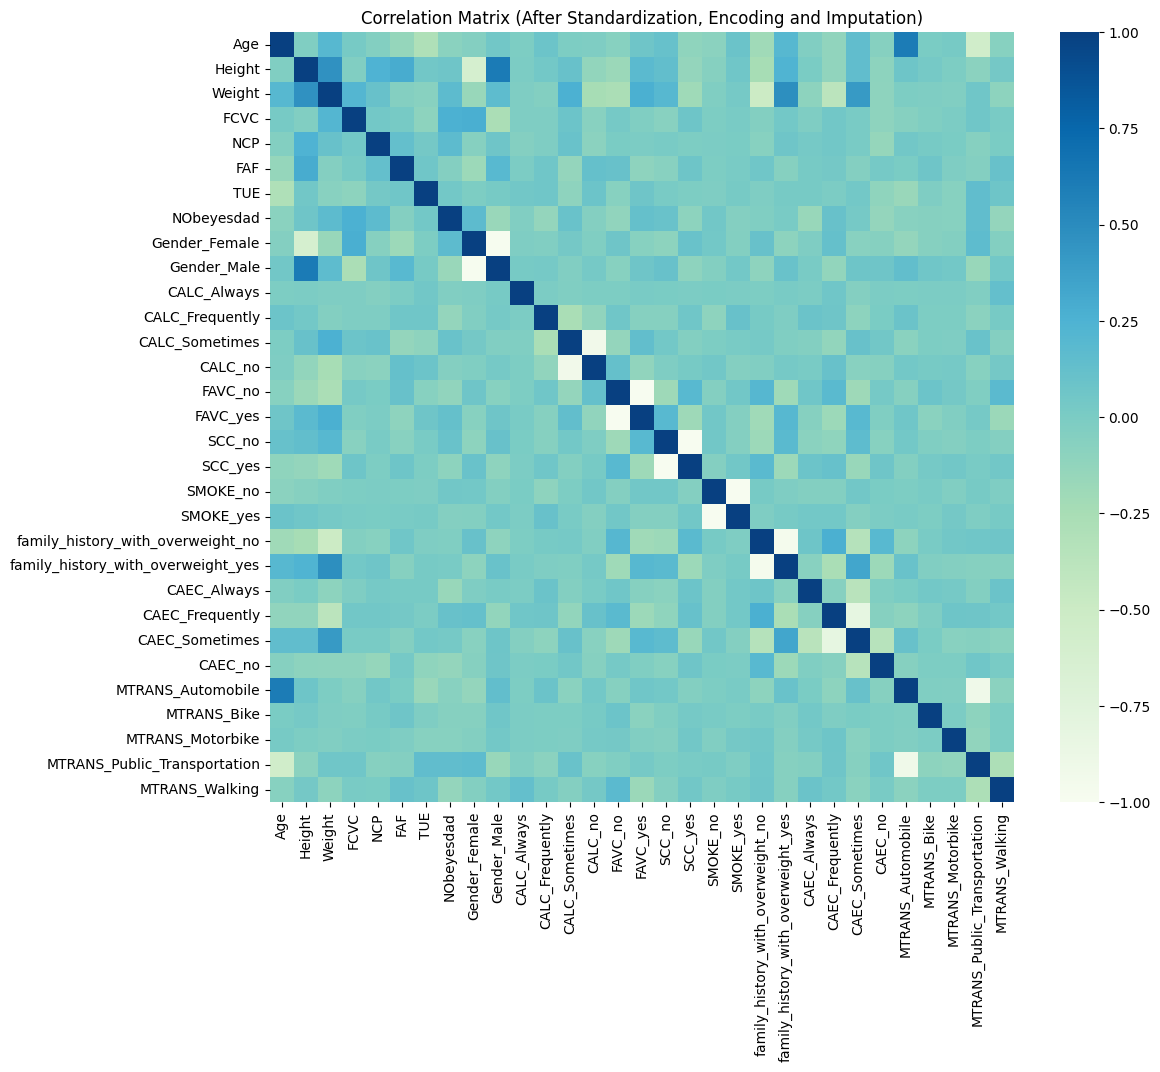

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=obesity_encoded.columns)

corr_after = X_scaled_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_after, cmap='GnBu')
plt.title('Correlation Matrix (After Standardization, Encoding and Imputation)')
plt.show()


X & Y Value

In [ ]:
X = X_scaled
y = obesity_encoded['NObeyesdad'].to_numpy()

CHECKING FEATURE WHICH HAS HIGHEST CORRELATION WITH

In [ ]:
X_dataframe = pd.DataFrame(X, columns= obesity_encoded.columns[:])
y_dataframe = pd.DataFrame(obesity_encoded['NObeyesdad'], columns=['NObeyesdad'])

corr_matrix = pd.concat([X_dataframe, y_dataframe], axis=1).corr()

correlations = corr_matrix.iloc[-1, :-1]

print(correlations.sort_values(ascending=False).head(5))

NObeyesdad       1.000000
FCVC             0.263320
Weight           0.169866
Gender_Female    0.164646
NCP              0.164165
Name: NObeyesdad, dtype: float64


SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_test, y_train, y_test = train_test_split(obesity_encoded.drop("NObeyesdad", axis=1), obesity_encoded["NObeyesdad"] , random_state=1, test_size= 0.3)

scaler = RobustScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print(" ")

print("Total number of samples:", len(X_scaled))
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))
print("Sum of samples in train and test:", len(X_train) + len(X_test))

test_size_example = len(X_test) / len(X_scaled)
print("Test size proportion:", test_size_example)

print('''
Checking if train and test split is successful
''')

print("Difference:", np.abs(test_size_example - 0.3))

X_train shape: (1477, 30)
X_test shape: (634, 30)
y_train shape: (1477,)
y_test shape: (634,)
 
Total number of samples: 2111
Number of samples in the training set: 1477
Number of samples in the testing set: 634
Sum of samples in train and test: 2111
Test size proportion: 0.3003315963998105

Checking if train and test split is successful

Difference: 0.0003315963998105076


verifying test & train overlapped or not

In [ ]:
X = pd.DataFrame(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

if any(np.intersect1d(X_train.index, X_test.index)):
    print("The train and test data is mixed.")
else:
    print("The train and test data is not mixed.")

The train and test data is not mixed.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_test, y_train, y_test = train_test_split(obesity_encoded.drop("NObeyesdad", axis=1), obesity_encoded["NObeyesdad"] , random_state=1, test_size= 0.3)

scaler = RobustScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)

(1477, 30)
(634, 30)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print(" ")

print("Total number of samples:", len(X_scaled))
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))
print("Sum of samples in train and test:", len(X_train) + len(X_test))

test_size_example = len(X_test) / len(X_scaled)
print("Test size proportion:", test_size_example)

print('''
Checking if train and test split is successful
''')

print("Difference:", np.abs(test_size_example - 0.3))

X_train shape: (1477, 30)
X_test shape: (634, 30)
y_train shape: (1477,)
y_test shape: (634,)
 
Total number of samples: 2111
Number of samples in the training set: 1477
Number of samples in the testing set: 634
Sum of samples in train and test: 2111
Test size proportion: 0.3003315963998105

Checking if train and test split is successful

Difference: 0.0003315963998105076


# **1. Linear Regression**

In [ ]:
linreg = LinearRegression().fit(X_train, y_train)
residuals = y_train - linreg.predict(X_train)
outlier_threshold = 3*np.std(residuals)
outliers = np.abs(residuals) > outlier_threshold

linreg_score = 0

if np.all(outliers):
    print("All samples are outliers, cannot fit a linear regression model")
else:
    X_train_cleaned, y_train_cleaned = X_train[~outliers], y_train[~outliers]

    linreg_cleaned = LinearRegression().fit(X_train_cleaned, y_train_cleaned)

    y_pred_cleaned = linreg_cleaned.predict(X_test)

    mse_cleaned = mean_squared_error(y_test, y_pred_cleaned)
    rmse_cleaned = np.sqrt(mse_cleaned)
    mae = mean_absolute_error(y_test, y_pred_cleaned)

    r2_score_cleaned = r2_score(y_test, y_pred_cleaned) * 100

    linreg_score = r2_score_cleaned
    linreg_mae = mae

    print(f"Mean Squared Error (MSE):{mse_cleaned:.2f}")
    print(f"Root Mean Squared Error (RMSE):{rmse_cleaned:.2f}")
    print(f"Mean Absolute Error (MAE) {mae:.2f}")
    print(" ")
    print(f"R-squared (R²):{r2_score_cleaned:.6f}%")

Mean Squared Error (MSE):3.97
Root Mean Squared Error (RMSE):1.99
Mean Absolute Error (MAE) 1.49
 
R-squared (R²):16.812212%


In [ ]:
train_accuracy = linreg_cleaned.score(X_train_cleaned, y_train_cleaned)

test_accuracy = linreg_cleaned.score(X_test, y_test)

print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)

Training accuracy: 0.2724971913159687
Test accuracy: 0.24419960276866848


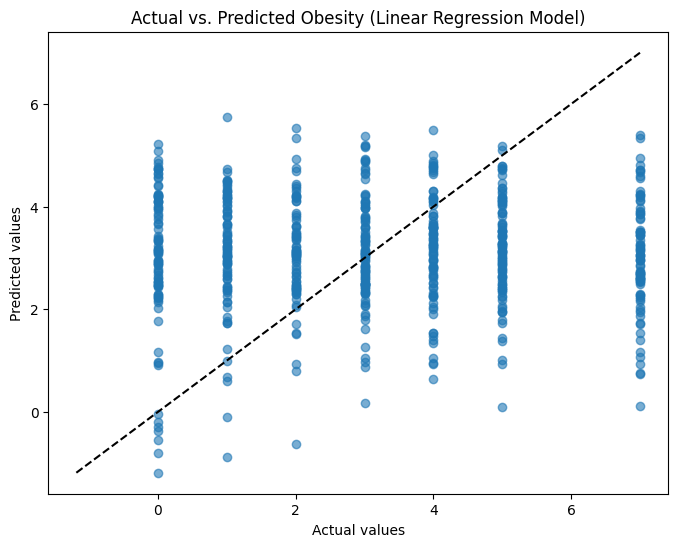

In [ ]:
min_val = min(y_test.min(), y_pred_cleaned.min())
max_val = max(y_test.max(), y_pred_cleaned.max())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_cleaned, alpha=0.6)
plt.plot([min_val, max_val], [min_val, max_val], '--k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted Obesity (Linear Regression Model)')
plt.show()

# **2.Decission Tree**

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    obesity_encoded.drop("NObeyesdad", axis=1),
    obesity_encoded["NObeyesdad"],
    test_size=0.3,
    random_state=42
)


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# predictions
y_pred = clf.predict(X_test)

# performance evalutation
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 90.38%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80        93
           1       0.84      0.80      0.82        88
           2       0.88      0.94      0.91        79
           3       0.96      0.89      0.92       102
           4       0.93      0.97      0.95        88
           5       0.99      0.99      0.99        98
           7       0.88      0.97      0.92        86

    accuracy                           0.90       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.90      0.90      0.90       634

Confusion Matrix:
 [[73  9  0  0  0  0 11]
 [12 70  6  0  0  0  0]
 [ 0  4 74  0  1  0  0]
 [ 1  0  4 91  5  1  0]
 [ 0  0  0  3 85  0  0]
 [ 0  0  0  1  0 97  0]
 [ 3  0  0  0  0  0 83]]


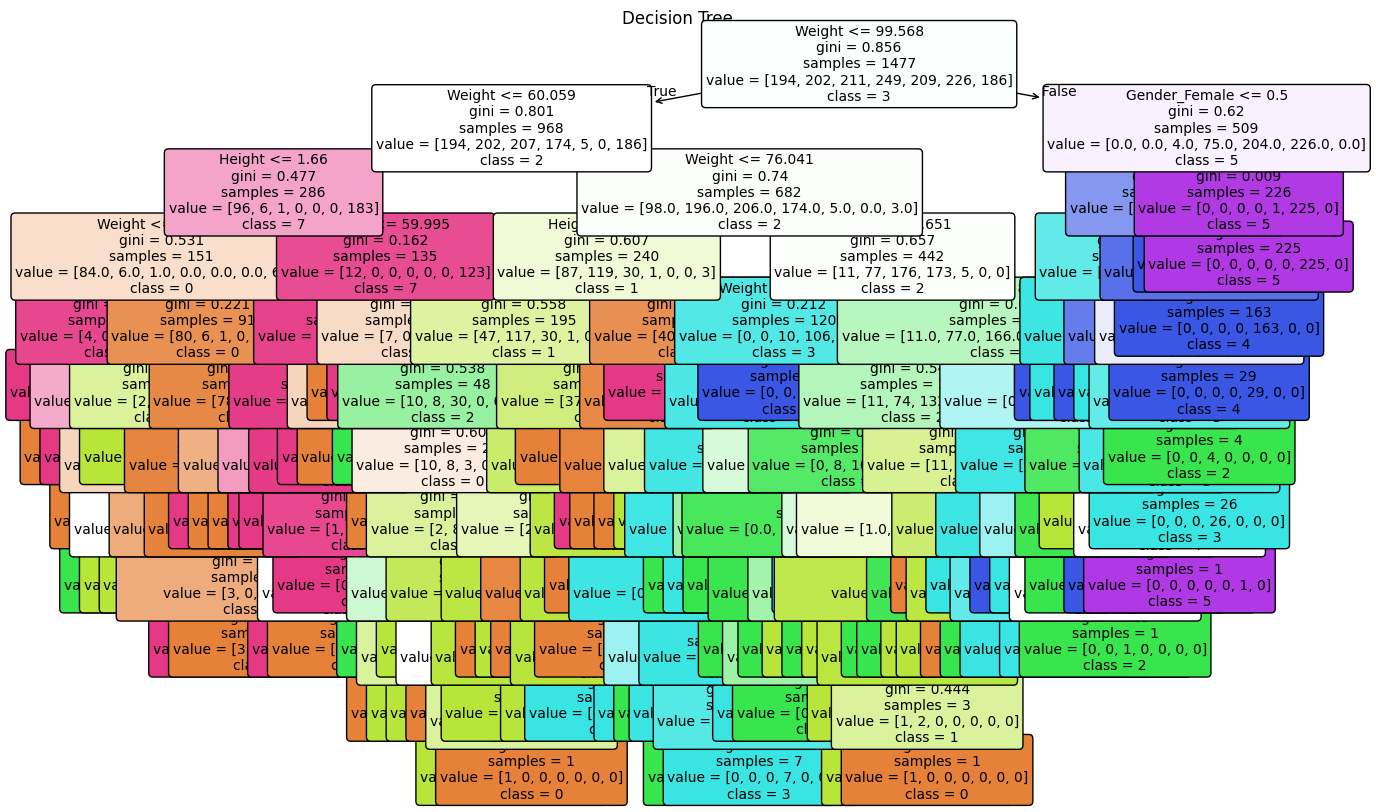

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Converting feature names and class names to strings
feature_names = list(map(str, X_train.columns))
class_names = list(map(str, clf.classes_))

# decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, rounded=True, fontsize=10)
plt.title("Decision Tree")
plt.show()


# **3. Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

label_encoder = LabelEncoder()
y_train_nn = label_encoder.fit_transform(y_train)
y_test_nn = label_encoder.transform(y_test)

label_encoder.fit(obesity_encoded["NObeyesdad"])


y_train_cat = to_categorical(y_train_nn)
y_test_cat = to_categorical(y_test_nn)


model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train_cat, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

y_pred_prob_nn = model.predict(X_test)
y_pred_nn = y_pred_prob_nn.argmax(axis=1)


nn_accuracy = accuracy_score(y_test_nn, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy * 100:.2f}%")
print("Confusion Matrix (NN):\n", confusion_matrix(y_test_nn, y_pred_nn))
print("Classification Report (NN):\n", classification_report(y_test_nn, y_pred_nn))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network Accuracy: 79.81%
Confusion Matrix (NN):
 [[62  7  5  0  0  0 19]
 [22 52 14  0  0  0  0]
 [ 4 11 61  3  0  0  0]
 [ 0  5 18 74  5  0  0]
 [ 0  0  8  6 74  0  0]
 [ 0  0  0  0  0 98  0]
 [ 1  0  0  0  0  0 85]]
Classification Report (NN):
               precision    recall  f1-score   support

           0       0.70      0.67      0.68        93
           1       0.69      0.59      0.64        88
           2       0.58      0.77      0.66        79
           3       0.89      0.73      0.80       102
           4       0.94      0.84      0.89        88
           5       1.00      1.00      1.00        98
           6       0.82      0.99      0.89        86

    accuracy                           0.80       634
   macro avg       0.80      0.80      0.79       634
weighted avg       0.81      0.80      0.80       634



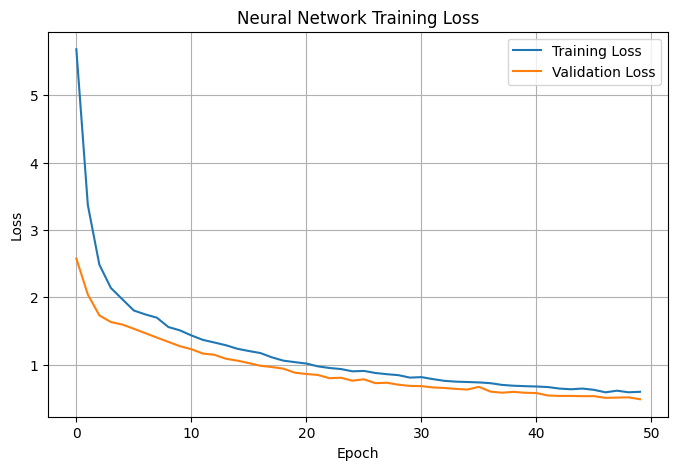

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Neural Network Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

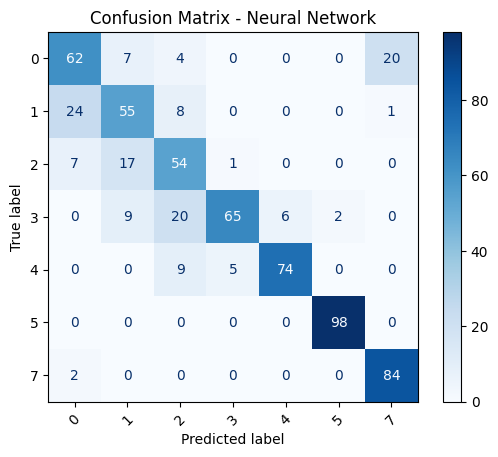

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_nn = confusion_matrix(y_test_nn, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Neural Network')
plt.xticks(rotation=45)
plt.show()

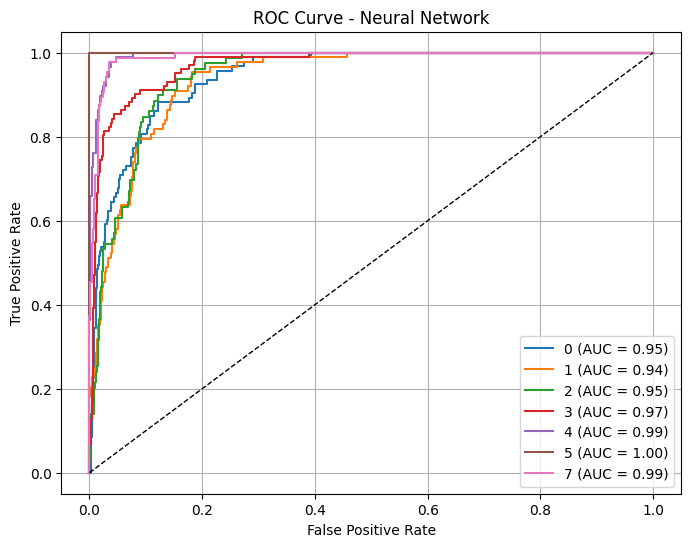

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


y_test_bin = label_binarize(y_test_nn, classes=range(len(label_encoder.classes_)))

# ROC and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(label_encoder.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob_nn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(label_encoder.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'{label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



# **4. KNN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X = obesity_encoded.drop("NObeyesdad", axis=1)
y = obesity_encoded["NObeyesdad"]

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


knn_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_accuracy * 100:.2f}%")


unique_labels = np.unique(y_test)

target_names = [str(label_encoder.inverse_transform([label])[0]) for label in unique_labels]

print(classification_report(y_test, y_pred, target_names=target_names))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 87.85%
              precision    recall  f1-score   support

           0       0.88      0.55      0.68        93
           1       0.80      0.89      0.84        88
           2       0.84      0.85      0.84        79
           3       0.88      0.93      0.90       102
           4       0.95      0.95      0.95        88
           5       0.97      1.00      0.98        98
           7       0.83      0.98      0.90        86

    accuracy                           0.88       634
   macro avg       0.88      0.88      0.87       634
weighted avg       0.88      0.88      0.87       634


Confusion Matrix:
[[51 16  7  2  0  0 17]
 [ 5 78  5  0  0  0  0]
 [ 0  3 67  9  0  0  0]
 [ 0  1  1 95  4  1  0]
 [ 0  0  0  2 84  2  0]
 [ 0  0  0  0  0 98  0]
 [ 2  0  0  0  0  0 84]]


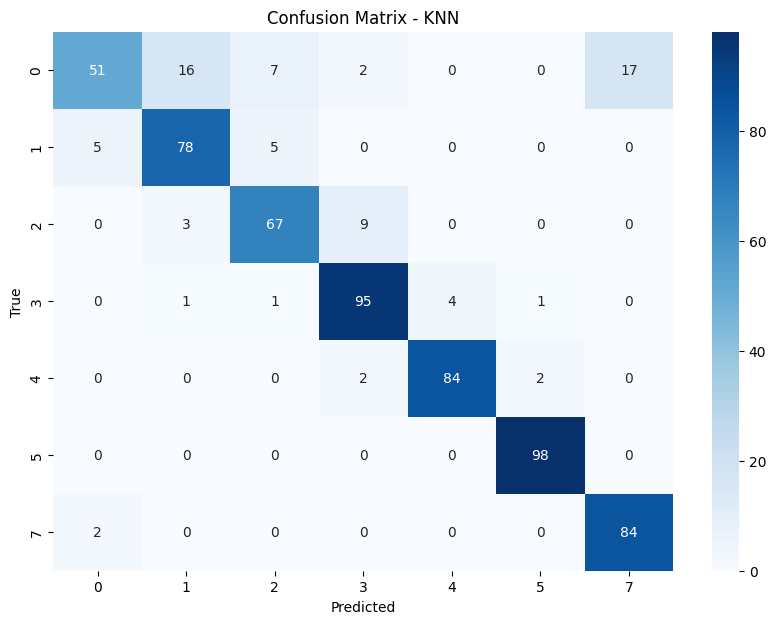

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.show()


# Comparison

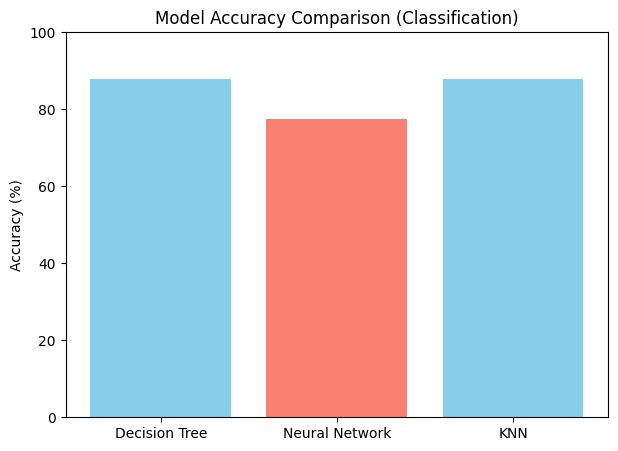

In [ ]:
import matplotlib.pyplot as plt

# Decision Tree accuracy
dt_accuracy = accuracy * 100  # from your earlier code
nn_accuracy_percent = nn_accuracy * 100
knn_accuracy_percent = knn_accuracy * 100
# Bar chart
model_names = ['Decision Tree', 'Neural Network', 'KNN']
accuracies = [dt_accuracy, nn_accuracy_percent, knn_accuracy_percent]

plt.figure(figsize=(7, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'salmon', 'red'])
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison (Classification)')
plt.ylim(0, 100)
plt.show()



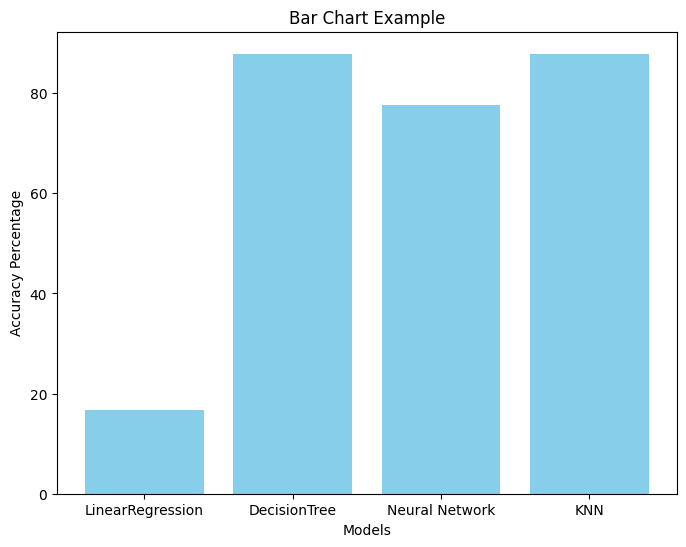

In [ ]:
# Sample data
categories = ['LinearRegression', 'DecisionTree', 'Neural Network', 'KNN']
values = [r2_score_cleaned, accuracy*100, nn_accuracy*100, knn_accuracy*100]

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy Percentage')
plt.title('Bar Chart Example')

# Show plot
plt.show()